# Annual Report Analysis

Here we will try some topic modelling

In [3]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from nltk.tokenize import sent_tokenize, word_tokenize

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt

# basic sklearn preprocessing dependencies
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

import re

In [5]:
# download nltk package
nltk.download('stopwords')
nltk.download('punkt')

stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/bingfeng93/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/bingfeng93/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
# used a generic data cleaner regex patterns I've found from StackOverflow from the previous coursework

def data_cleaner(text, return_tokens = False):
    '''
    Cleans the data from special characters, urls, punctuation marks, extra spaces.
    Removes stopwords (Like if, it, the etc) and transforms the word in its native
    form using Porter Stemmer.
    '''
    text = str(text).lower() # lowercase the string
    text = re.sub('\[.*?\]', ' ', text) # replace punctuation with whitespaces.
    text = re.sub('https?://\S+|www\.\S+', ' ', text) # replacing urls with whitespaces.
    text = re.sub('<.*?>+', ' ', text) # removes special characters
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text) # removes punctuation
    text = re.sub('\r', ' ', text) # removes new line characters
    text = re.sub('\n', ' ', text) # removes new line characters
    text = re.sub('\w*\d\w*', ' ', text)
    #text = re.sub('–', ' ', text) # remove any additional characters we cannot remove 
    text = re.sub('[–£…»]', ' ', text) # remove any additional characters we cannot remove 
    text = text.split()

    # removing stopwords.
    text = [word for word in text if not word in stopword]

    # stemming.
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text]

    if return_tokens:

        # return relevant tokens here where needed
        return text

    #List to string.
    text = ' '.join(text)

    return text

In [7]:
# perform the LSA works
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer


In [8]:
# look at this later if needed - just have a raw selection of the code in here now and see how it runs!!

# think of converting into different sets for hyperparameter tuning afterwards if needed.

# train_set_df , validation_set_df = train_test_split(news_analysis_df,  test_size = 0.2, random_state=SEED)

In [9]:
# review the text that has been preprocessed from the raw text
# text_lsa = train_set_df["text_full_raw_preprocessed"].apply(data_cleaner, return_tokens=False)
# text_lsa.values[:5]

In [10]:
# documents = text_lsa.to_list() # change this to additional edits and additional preprocessing where needed
# len(documents)

In [11]:
# # see the TF-IDF matrix
# X.shape

In [12]:
SEED = 30224
np.random.seed(SEED)

## LDA details

In [13]:
from gensim.corpora.dictionary import Dictionary
from gensim.test.utils import common_texts
from gensim.models import LdaMulticore, CoherenceModel # coherence to find the optimal number of topics

import matplotlib.colors as mcolors
from pyrolite.comp.codata import logratiomean # pip install pyrolite
import itertools

In [14]:
import json

In [13]:
with open("../2.Initial_Graph_Building/annual_report_data/all_companies_report_annual_report_text_2022_2024.json", encoding = "utf-8") as file:

    sec_10k_lst = json.load( file )

In [14]:
len(sec_10k_lst)

2373

In [15]:
sec_10k_df = pd.DataFrame(sec_10k_lst)

In [16]:
sec_10k_df

,id,accessionNo,cik,ticker,companyName,companyNameLong,formType,description,filedAt,linkToTxt,...,linkToXbrl,linkToFilingDetails,entities,documentFormatFiles,dataFiles,seriesAndClassesContractsInformation,periodOfReport,Text_1,Text_1A,effectivenessDate
0,c192751c88f50d8ca603ab72c5840583,0000318154-24-000011,318154,AMGN,AMGEN INC,AMGEN INC (Filer),10-K,Form 10-K - Annual report [Section 13 and 15(d...,2024-02-14T16:23:32-05:00,https://www.sec.gov/Archives/edgar/data/318154...,...,,https://www.sec.gov/Archives/edgar/data/318154...,"[{'companyName': 'AMGEN INC (Filer)', 'cik': '...","[{'sequence': '1', 'description': '10-K', 'doc...","[{'sequence': '17', 'description': 'XBRL TAXON...",[],2023-12-31,Item 1. BUSINESS ##TABLE_END\n\nAmgen Inc. (i...,Item 1A. RISK FACTORS ##TABLE_END\n\nThis rep...,NaN
1,3f8f2f776c43180b8573405b00605c15,0000318154-23-000017,318154,AMGN,AMGEN INC,AMGEN INC (Filer),10-K,Form 10-K - Annual report [Section 13 and 15(d...,2023-02-09T16:26:31-05:00,https://www.sec.gov/Archives/edgar/data/318154...,...,,https://www.sec.gov/Archives/edgar/data/318154...,"[{'companyName': 'AMGEN INC (Filer)', 'cik': '...","[{'sequence': '1', 'description': '10-K', 'doc...","[{'sequence': '11', 'description': 'XBRL TAXON...",[],2022-12-31,Item 1. BUSINESS ##TABLE_END\n\nAmgen Inc. (i...,Item 1A. RISK FACTORS ##TABLE_END\n\nThis rep...,NaN
2,1d205d8c366bf6e51746f33967a1141d,0000318154-22-000010,318154,AMGN,AMGEN INC,AMGEN INC (Filer),10-K,Form 10-K - Annual report [Section 13 and 15(d...,2022-02-16T16:39:53-05:00,https://www.sec.gov/Archives/edgar/data/318154...,...,,https://www.sec.gov/Archives/edgar/data/318154...,"[{'companyName': 'AMGEN INC (Filer)', 'cik': '...","[{'sequence': '1', 'description': '10-K', 'doc...","[{'sequence': '13', 'description': 'XBRL TAXON...",[],2021-12-31,Item 1. BUSINESS ##TABLE_END\n\nAmgen Inc. (i...,Item 1A. RISK FACTORS ##TABLE_END\n\nThis rep...,NaN
3,358cf2de3309caed349f7d4505bf6d49,0001628280-24-005397,9326,BCPC,BALCHEM CORP,BALCHEM CORP (Filer),10-K,Form 10-K - Annual report [Section 13 and 15(d...,2024-02-16T17:26:27-05:00,https://www.sec.gov/Archives/edgar/data/9326/0...,...,,https://www.sec.gov/Archives/edgar/data/9326/0...,"[{'companyName': 'BALCHEM CORP (Filer)', 'cik'...","[{'sequence': '1', 'description': '10-K', 'doc...","[{'sequence': '14', 'description': 'XBRL TAXON...",[],2023-12-31,"Item 1. Business (All amounts in thousands, e...",Item 1A. Risk Factors \n\nWe discuss our expe...,NaN
4,1941cf293846a69b64943f8b2b3ff87f,0001628280-23-005074,9326,BCPC,BALCHEM CORP,BALCHEM CORP (Filer),10-K,Form 10-K - Annual report [Section 13 and 15(d...,2023-02-24T16:43:02-05:00,https://www.sec.gov/Archives/edgar/data/9326/0...,...,,https://www.sec.gov/Archives/edgar/data/9326/0...,"[{'companyName': 'BALCHEM CORP (Filer)', 'cik'...","[{'sequence': '1', 'description': '10-K', 'doc...","[{'sequence': '12', 'description': 'XBRL TAXON...",[],2022-12-31,"Item 1. Business (All amounts in thousands, e...",Item 1A. Risk Factors \n\nWe discuss our expe...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368,437a263932014ad06bcdbde870c7ae88,0001493152-24-009769,1857044,INDP,"Indaptus Therapeutics, Inc.","Indaptus Therapeutics, Inc. (Filer)",10-K,Form 10-K - Annual report [Section 13 and 15(d...,2024-03-13T08:02:27-04:00,https://www.sec.gov/Archives/edgar/data/185704...,...,,https://www.sec.gov/Archives/edgar/data/185704...,"[{'companyName': 'Indaptus Therapeutics, Inc. ...","[{'sequence': '1', 'documentUrl': 'https://www...","[{'sequence': '16', 'description': 'XBRL SCHEM...",[],2023-12-31,Item 1. Business. \n\n&#160; \n\nOverview \n\...,Item 1A. Risk Factors. \n\n&#160; \n\nYou sho...,NaN
2369,8751e66576529b1cda4f7faf672dbdc1,0001493152-23-008010,1857044,INDP,"Indaptus Therapeutics, Inc.","Indaptus Therapeutics, Inc. (Filer)",10-K,Form 10-K - Annual report [Section 13 and 15(d...,2023-03-17T08:05:56-04:00,https://www.sec.gov/Archives/edgar/data/185704...,...,,htt

In [17]:
sec_10k_df.columns

Index(['id', 'accessionNo', 'cik', 'ticker', 'companyName', 'companyNameLong',
       'formType', 'description', 'filedAt', 'linkToTxt', 'linkToHtml',
       'linkToXbrl', 'linkToFilingDetails', 'entities', 'documentFormatFiles',
       'dataFiles', 'seriesAndClassesContractsInformation', 'periodOfReport',
       'Text_1', 'Text_1A', 'effectivenessDate'],
      dtype='object')

Given the basic stop words let's now analyse the topics of the documents over time.

Look at the risk profile of the annual report here.

In [18]:
# load the documents here and that's it!!

# no need to use preprocessed - just use the data that is there and that's it!!

# convert into series and then match with the original

sec_10k_risk_1A = sec_10k_df["Text_1A"]

In [19]:
text_lda = sec_10k_risk_1A

In [20]:
docs_tok = text_lda.apply(data_cleaner, return_tokens=True)
len(docs_tok) # 6 minutes to run everything - see if there is a more effient way to to do this!!

2373

In [23]:
sec_10k_df["Text_1A_data_cleaned"] = docs_tok

In [24]:
sec_10k_df.to_json("all_companies_metadata_2022_2024_text_1A_cleaned.json")

Restart workflow here

In [15]:
with open("all_companies_metadata_2022_2024_text_1A_cleaned.json", encoding = "utf-8") as file:

    sec_10k_lst_ = json.load( file )


In [16]:
sec_10k_df = pd.DataFrame(sec_10k_lst_)

In [17]:
docs_tok = sec_10k_df["Text_1A_data_cleaned"]

In [18]:
# now build the term frequency matrix as required by LDA

common_dictionary = Dictionary(docs_tok)

common_corpus = [common_dictionary.doc2bow(text) for text in docs_tok]

In [19]:
from tqdm import tqdm

Finding multiple topics this way can be quite time consuming - so we need some alternative Bayesian way to achieve this instead!!

Here we use the frequentist approach here to find the best number of topics, although a more optimal frequentist approach could work better.

In [20]:
# # finding the optimal number of topics between 2 and 10

# # TAKES 7 minutes to run BEWARE!!
# min_topics = 2
# max_topics = 10

# model_list = []
# coherence_values = []

# for num_topics in tqdm(range(min_topics, max_topics + 1)):
#     # we train the lda model - using the same code from the lda lab in uda
#     lda_model = LdaMulticore(corpus=common_corpus,
#                              id2word=common_dictionary,
#                              num_topics=num_topics,
#                              passes=10)
    
#     model_list.append(lda_model)
    
#     # here we calculate the coherence score
#     # recommended method for optimal topic on matheworks and stackoverflow
#     # https://stackoverflow.com/questions/17421887/how-to-determine-the-number-of-topics-for-lda
#     # https://uk.mathworks.com/help/textanalytics/ug/choose-number-of-topics-for-LDA-model.html
#     coherence_model_lda = CoherenceModel(model=lda_model, texts=docs_tok, dictionary=common_dictionary, coherence='c_v')
#     coherence_lda = coherence_model_lda.get_coherence()
#     coherence_values.append(coherence_lda)

# # select the optimal model topics based on stackoverflow
# optimal_model_index = coherence_values.index(max(coherence_values))
# optimal_model = model_list[optimal_model_index]
# optimal_num_topics = min_topics + optimal_model_index

# print("Optimal Number of Topics:", optimal_num_topics)

# # create a graph from the above, for this.

# # reduce the size for the details for workflow

In [21]:
# topics_range = range(min_topics, max_topics + 1)

# plt.figure(figsize=(10, 6))
# plt.plot(topics_range, coherence_values, marker='o')
# plt.xlabel("Number of Topics")
# plt.ylabel("Coherence score")
# plt.title("LDA Model Coherence Scores by Number of Topics")
# plt.xticks(topics_range)
# plt.grid(True)

Problem - LDA can take a lot of time to run given the sheer number of documents

So there is a limitation to this approach, could decide to summarise to speed up the computational time if this isn't working!!

There is a problem with the CPU cores and notebook, maybe fix that later, maybe notebook instructions (Try notebook and also Python 11 if issue persists)

In [22]:
num_topics = 6
lda_model = LdaMulticore(corpus=common_corpus,
                         id2word=common_dictionary,
                         num_topics=num_topics,
                        passes=10
                        )

In [ ]:
# coherence_values

Show topic importance

ValueError: x and y must have same first dimension, but have shapes (9,) and (1,)

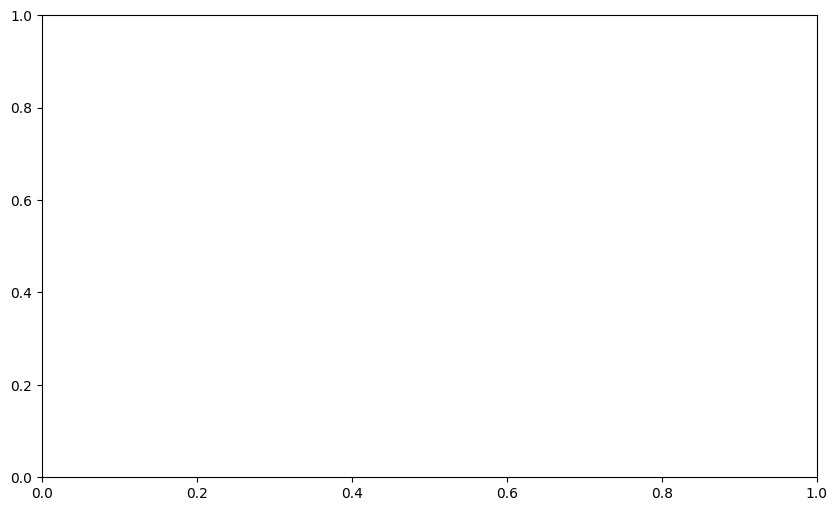

In [ ]:
topics = lda_model.show_topics(formatted=False)
counter = Counter(common_dictionary)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# change the code below to be in another format here.

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 3, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

# Visualise everything by topic importance

In [ ]:
import gensim

# get gensim representation of document topic matrix
doc_topic_matrix = [lda_model.get_document_topics(bow) for bow in common_corpus]

# convert to document-topic matrix
matrix = gensim.matutils.corpus2dense(doc_topic_matrix, num_terms=lda_model.num_topics)

# get dominant topic for each document
dominant_topic = np.argmax(matrix, axis=0)

# t-SNE
tsne_model = TSNE(n_components=2, perplexity=50, learning_rate=100, n_iter=2000, random_state=0)
tsne_values = tsne_model.fit_transform(matrix.T)

x = tsne_values[:, 0]
y = tsne_values[:, 1]
plt.scatter(x, y)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE visualization of LDA document-topic distribution')

We next look at the best topics probability distribution of topics

In [ ]:
doc_topic_matrix = [lda_model.get_document_topics(bow) for bow in common_corpus]

# convert to document-topic matrix
matrix = gensim.matutils.corpus2dense(doc_topic_matrix, num_terms=lda_model.num_topics)

# get dominant topic for each document
dominant_topic = np.argmax(matrix, axis=0)

# t-SNE
tsne_model = TSNE(n_components=2, perplexity=50, learning_rate=100, n_iter=2000, random_state=0)
tsne_values = tsne_model.fit_transform(matrix.T)

colors = plt.cm.tab10(np.linspace(0, 1, 9))

plt.figure(figsize=(12, 6))
for i, color in zip(range(lda_model.num_topics), colors):
    indices = dominant_topic == i
    plt.scatter(tsne_values[indices, 0], tsne_values[indices, 1], c=color, label=f'Topic {i}')

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE visualization of LDA document-topic distribution')
plt.legend(loc='best')

Next we run the LDA for the best number of topics

Folllow the topic distribution code below, to get the information you need!!

https://chatgpt.com/share/beece0f2-5aae-43e2-b28e-7d9e64014dc3

### Ideas for graphs
1. Doing text preprocessing as required
1. Topic modelling (dynamic over time)
    - with LSA and LDA structure
1. Sentiment analysis (with Finbert)